# Image Enhancement


### Author: Dr. Irfan

### Import libraries

In [6]:

import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter, ImageEnhance
import matplotlib.pylab as pylab

def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks

def rgb2gray(im):
    '''
    the input image is an RGB image
    with pixel values for each channel in [0,1]
    '''
    return np.clip(0.2989 * im[...,0] + 0.5870 * im[...,1] + 0.1140 * im[...,2], 0, 1)        

In [7]:
# --- Increase Brightness of the Image

img = Image.open(r"images/b1.jpg")

img2 = ImageEnhance.Brightness(img)

im = img2.enhance(1.7)

img.show()
im.show()


In [8]:
# --- Increase Contrast of the Image

img = Image.open(r"images/b1.jpg")

img2 = ImageEnhance.Contrast(img)

im = img2.enhance(1.7)

img.show()
im.show()


In [9]:
# --- Increase Sharpness of the Image

img = Image.open(r"images/m1.jpg")

img2 = ImageEnhance.Sharpness(img)

im = img2.enhance(6.7)

img.show()
im.show()

In [10]:
# --- Increase Color of the Image

img = Image.open(r"images/m1.jpg")

img2 = ImageEnhance.Color(img)

im = img2.enhance(1.7)

img.show()
im.show()

# Sharpening with Laplacian
An image can be sharpened using the Laplacian filter with the following couple of steps:

1. Apply the Laplacian filter to the original input image.
2. Add the output image obtained from step 1 and the original input image (to obtain the sharpened image). The following code block demonstrates how to implement the preceding algorithm using scikit-image filters module's laplace() function:

C:\Users\Irfan\AppData\Local\Temp/ipykernel_3000/238892148.py:10: RuntimeWarning: divide by zero encountered in true_divide
  im_dir = np.arctan(im_y/im_x)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_3000/238892148.py:10: RuntimeWarning: invalid value encountered in true_divide
  im_dir = np.arctan(im_y/im_x)


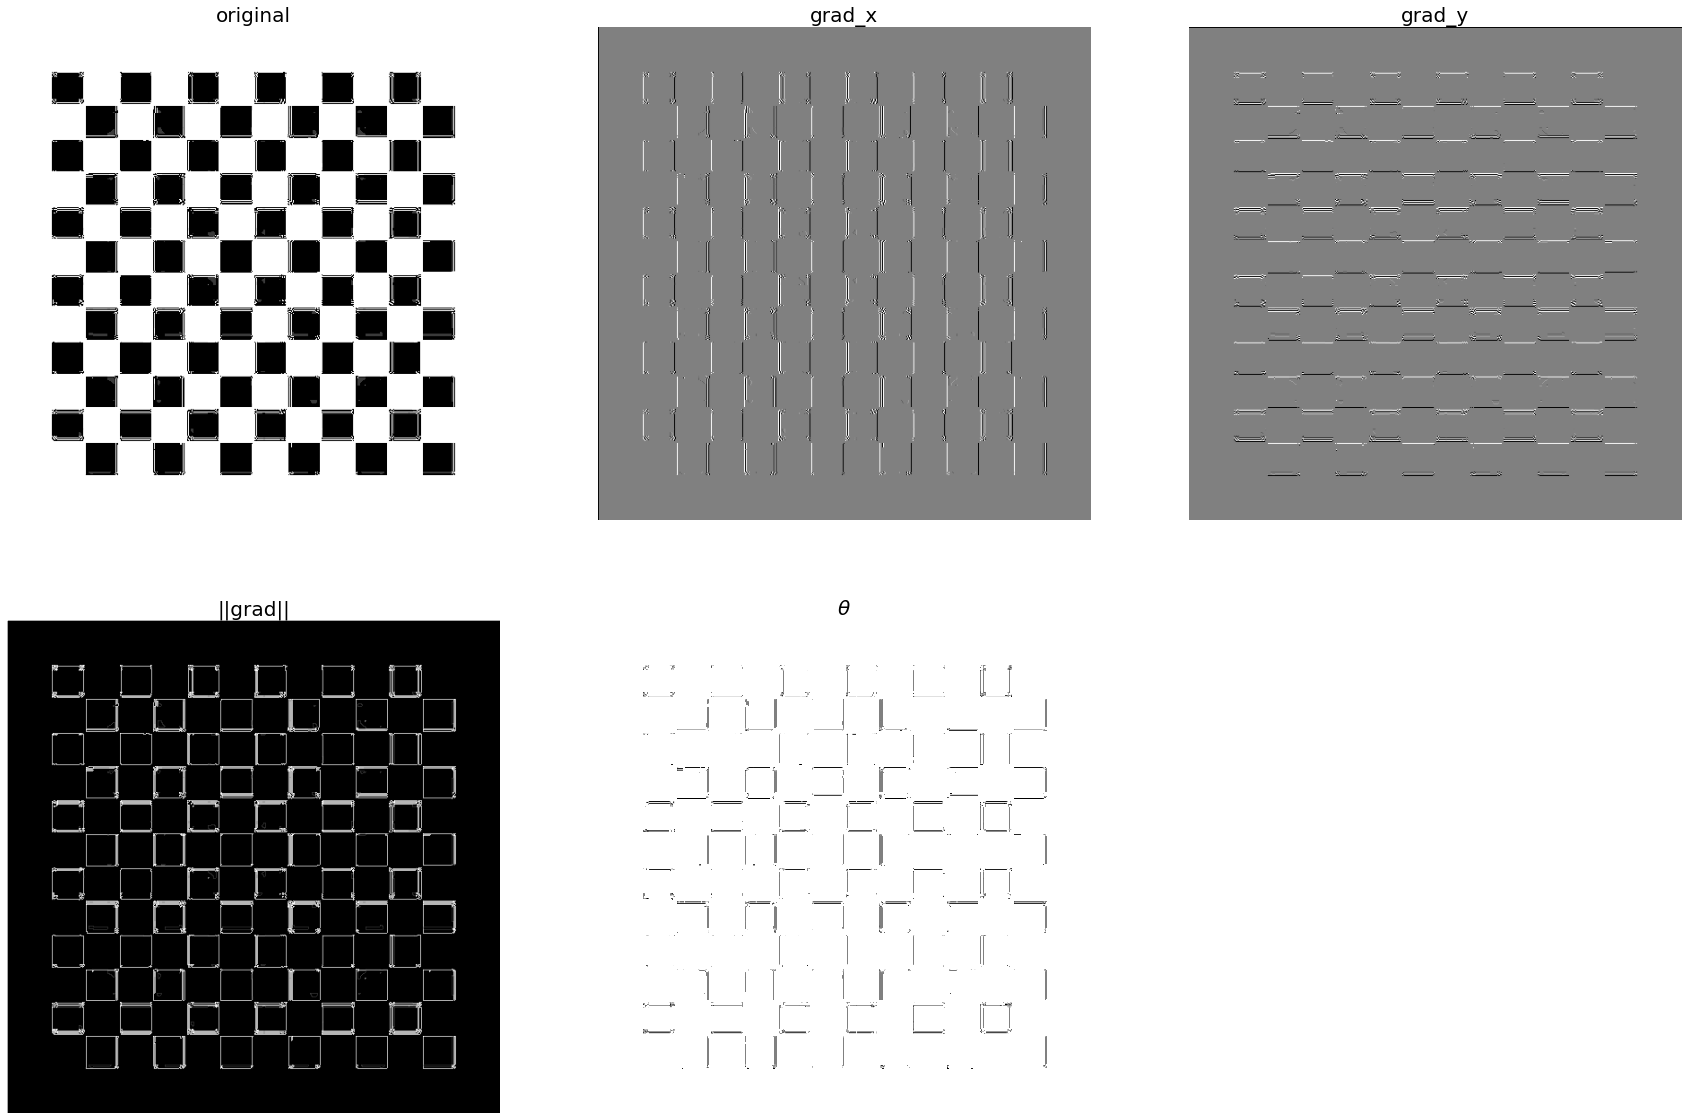

In [11]:
ker_x = [[-1, 1]]   # kernel for x-axix
ker_y = [[-1], [1]] # kernel for y-axis

im = rgb2gray(imread('images/chess.jpg'))

im_x = signal.convolve2d(im, ker_x, mode='same')
im_y = signal.convolve2d(im, ker_y, mode='same')

im_mag = np.sqrt(im_x**2 + im_y**2)
im_dir = np.arctan(im_y/im_x)


pylab.figure(figsize=(30,20))
pylab.gray()
pylab.subplot(231), plot_image(im, 'original') 
pylab.subplot(232), plot_image(im_x, 'grad_x')
pylab.subplot(233), plot_image(im_y, 'grad_y')
pylab.subplot(234), plot_image(im_mag, '||grad||')
pylab.subplot(235), plot_image(im_dir, r'$\theta$')
pylab.show()

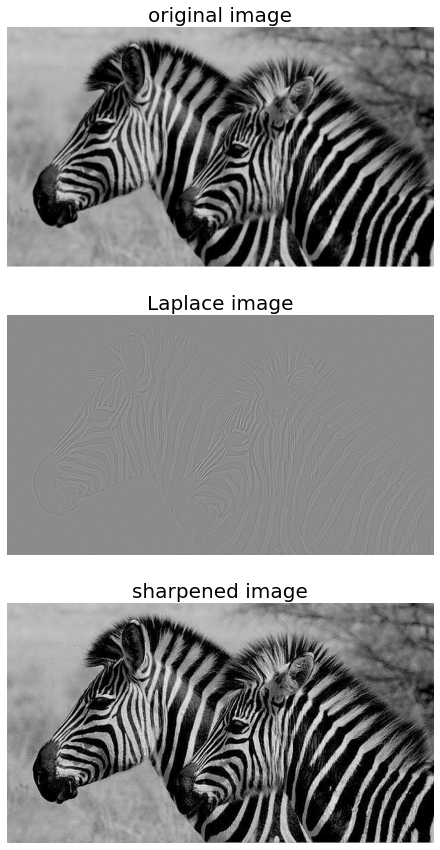

In [12]:
from skimage.io import imread
from skimage.filters import laplace

im = imread('images/z1.jpg', as_gray=True)
im1 = laplace(im)
im2 = np.clip(im + laplace(im) , 0, 1)   # Changing the (0,1) to (1,0), (0,2) will produce different result 

pylab.figure(figsize=(15,15))
pylab.gray()
pylab.subplot(311), plot_image(im, 'original image')
pylab.subplot(312), plot_image(im1, 'Laplace image')
pylab.subplot(313), plot_image(im2, 'sharpened image')
pylab.show()

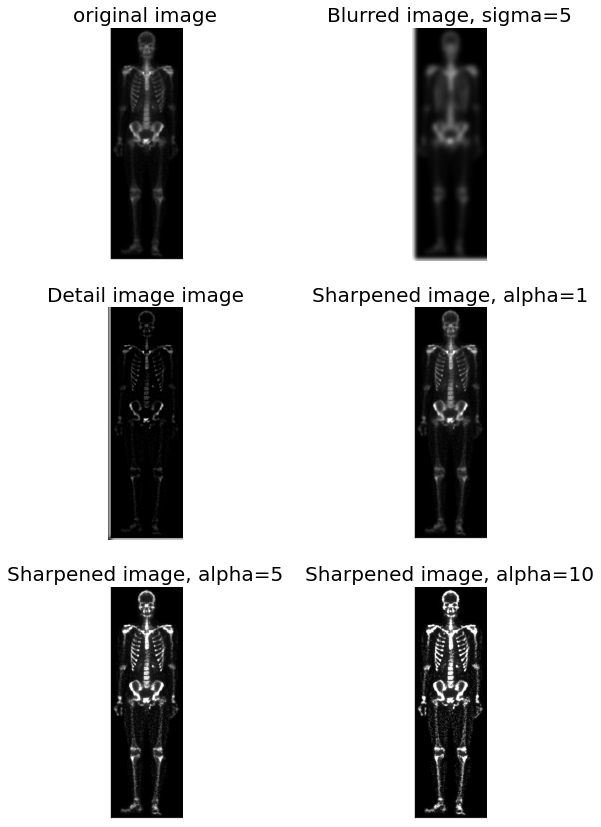

In [13]:
def rgb2gray(im):
    '''
    the input image is an RGB image
    with pixel values for each channel in [0,1]
    '''
    return np.clip(0.2989 * im[...,0] + 0.5870 * im[...,1] + 0.1140 * im[...,2], 0, 1)


im = rgb2gray(img_as_float(Image.open('images/X1.jpg')))

im_blurred = ndimage.gaussian_filter(im, 5) 

im_detail = np.clip(im - im_blurred, 0, 1)


pylab.figure(figsize=(10,30))
pylab.gray()
pylab.subplot(621), plot_image(im, 'original image')
pylab.subplot(622), plot_image(im_blurred, 'Blurred image, sigma=5')
pylab.subplot(623), plot_image(im_detail, 'Detail image image')

alpha = [1, 5, 10]

im_sharp1 = np.clip(im + 1*im_detail, 0, 1)
im_sharp5 = np.clip(im + 5*im_detail, 0, 1)
im_sharp10 = np.clip(im + 10*im_detail, 0, 1)

pylab.subplot(624), plot_image(im_sharp1, 'Sharpened image, alpha=1')
pylab.subplot(625), plot_image(im_sharp5, 'Sharpened image, alpha=5')
pylab.subplot(626), plot_image(im_sharp10, 'Sharpened image, alpha=10')

pylab.show()